<a href="https://colab.research.google.com/github/Taiga10969/Learn-the-basics/blob/main/timm/CosineLRScheduler_research.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install timm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import torch
import torch.nn as nn

class SimpleModel(nn.Module):
    def __init__(self):
        super(SimpleModel, self).__init__()
        self.fc1 = nn.Linear(10, 20)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(20, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# モデルのインスタンス化
model = SimpleModel()


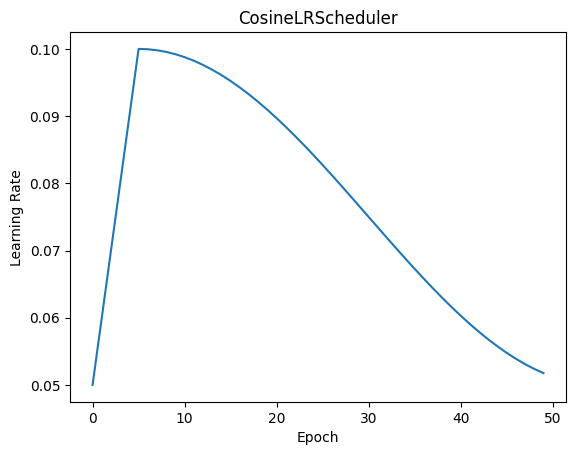

In [ ]:
import matplotlib.pyplot as plt
import torch

# パラメータとスケジューラーの定義
from timm.scheduler import CosineLRScheduler
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)
scheduler = CosineLRScheduler(optimizer, t_initial=50, lr_min=5e-2,
                              warmup_t=5, warmup_lr_init=5e-2, warmup_prefix=True)

# 学習率の履歴を保持するリスト
lr_history = []

# エポックごとに学習率を更新し、履歴に追加
for epoch in range(50):
    optimizer.step()
    scheduler.step(epoch)
    lr_history.append(optimizer.param_groups[0]['lr'])

# 学習率の履歴をプロット
plt.plot(lr_history)
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.title('CosineLRScheduler')
plt.savefig('CosineLRScheduler.svg')
plt.show()


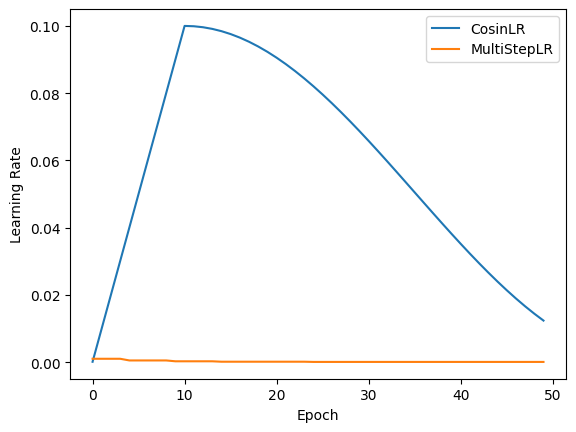

In [ ]:
import torch.optim.lr_scheduler as lr_scheduler
import torch
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)
scheduler = lr_scheduler.MultiStepLR(optimizer, milestones=[5,10,15,25], gamma=0.5)

# 学習率の履歴を保持するリスト
lr_history2 = []

# エポックごとに学習率を更新し、履歴に追加
for epoch in range(50):
    optimizer.step()
    scheduler.step()
    lr_history2.append(optimizer.param_groups[0]['lr'])

# 学習率の履歴をプロット
plt.plot(lr_history, label='CosinLR')
plt.plot(lr_history2, label='MultiStepLR')
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
#plt.title('CosineLRScheduler')
plt.legend()
plt.savefig('CosineLRScheduler.svg')
plt.show()

In [ ]:
! pip install torchinfo

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import timm
from torchinfo import summary
m = timm.create_model('vit_large_patch16_224', pretrained=True)

In [ ]:
summary(model=m, input_size=(1, 3, 224, 224))

Layer (type:depth-idx)                   Output Shape              Param #
VisionTransformer                        [1, 1000]                 202,752
├─PatchEmbed: 1-1                        [1, 196, 1024]            --
│    └─Conv2d: 2-1                       [1, 1024, 14, 14]         787,456
│    └─Identity: 2-2                     [1, 196, 1024]            --
├─Dropout: 1-2                           [1, 197, 1024]            --
├─Identity: 1-3                          [1, 197, 1024]            --
├─Identity: 1-4                          [1, 197, 1024]            --
├─Sequential: 1-5                        [1, 197, 1024]            --
│    └─Block: 2-3                        [1, 197, 1024]            --
│    │    └─LayerNorm: 3-1               [1, 197, 1024]            2,048
│    │    └─Attention: 3-2               [1, 197, 1024]            4,198,400
│    │    └─Identity: 3-3                [1, 197, 1024]            --
│    │    └─Identity: 3-4                [1, 197, 1024]          